In [2]:
import numpy as np
import sys
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load some useful cartopy routines
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# and a new matplotlib jroutine
import matplotlib.path as mpath

In [4]:
sys.path.append('/home/plernida/ECCOv4-py/ECCOv4-py')
import ecco_v4_py as ecco

In [5]:
base_dir = '/home/plernida/Desktop/ECCOv4-release'

ECCO_dir =  base_dir + '/Release3_alt'

In [6]:
## Load the model grid
grid_dir= ECCO_dir + '/nctiles_grid/'
ecco_grid = ecco.load_ecco_grid_nc(grid_dir, 'ECCOv4r3_grid.nc')

## Load one year of 2D daily data, SSH, SST, and SSS
day_mean_dir= ECCO_dir + '/nctiles_daily/'
ecco_vars = ecco.recursive_load_ecco_var_from_years_nc(day_mean_dir, \
                                                       vars_to_load=['SSH','THETA', 'SALT'], \
                                                       years_to_load=2000)
## Merge the ecco_grid with the ecco_vars to make the ecco_ds
ecco_ds = xr.merge((ecco_grid , ecco_vars)).load()

loading files of  SSH
loading files of  SALT
loading files of  THETA


Text(0, 0.5, 'y -->')

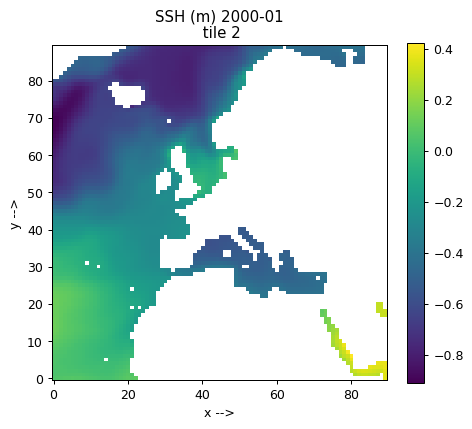

In [7]:
## Tile 2 (Northeast Atlantic) 
## imshow

plt.figure(figsize=(6,5), dpi= 90)

# Step 1, select the tile to plot using the **.isel( )** syntax.

tile_to_plot = ecco_ds.SSH.isel(tile=2, time=0)
tile_to_plot= tile_to_plot.where(ecco_ds.hFacC.isel(tile=2,k=0) !=0, np.nan)

# Step 2, use plt.imshow()

plt.imshow(tile_to_plot, origin='lower');

# Step 3, add colorbar, title, and x and y axis labels

plt.colorbar()
plt.title('SSH (m) ' + str(ecco_ds.time[0].values)[0:7] + '\n tile 2')
plt.xlabel('x -->')
plt.ylabel('y -->')

## Tiles 0-5 are by default in a quasi-lat-lon orientation. +x is to the east and +y is to the north.

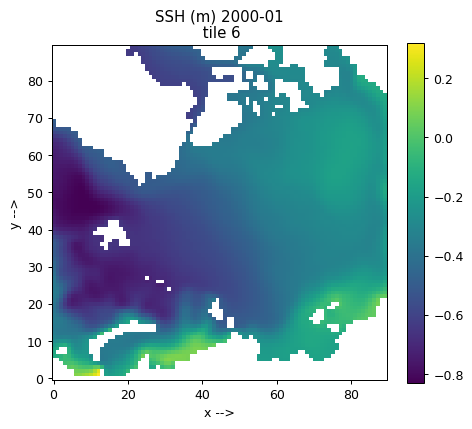

In [20]:
## Tile 6 (the Arctic cap)

plt.figure(figsize=(6,5), dpi= 90)
# Step 1, select the tile to plot using the **.isel( )** syntax.

tile_to_plot = ecco_ds.SSH.isel(tile=6, time=2)
tile_to_plot= tile_to_plot.where(ecco_ds.hFacC.isel(tile=6,k=0) !=0, np.nan)

# Step 2, use plt.imshow()

plt.imshow(tile_to_plot, origin='lower');

# Step 3, add colorbar, title, and x and y axis labels

plt.colorbar()
plt.title('SSH (m) ' + str(ecco_ds.time[2].values)[0:7] + '\n tile 6')
plt.xlabel('x -->');
plt.ylabel('y -->');

## because tile 6 is the Arctic cap, x and y do not map to east and west throughout domain

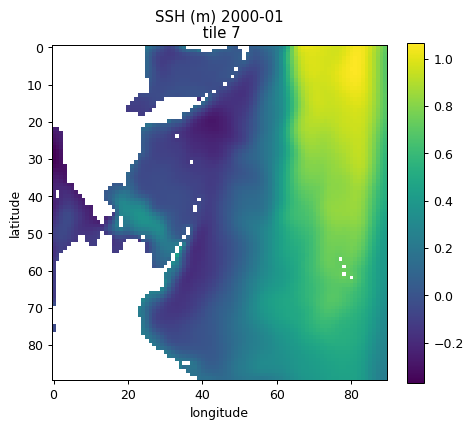

In [18]:
## Tile 7 (N. Pacific/Bering Sea/Chukchi Sea)
## For tiles 7-12, positive x is southwards and positive y is eastwards

plt.figure(figsize=(6,5), dpi= 90)
# pull out lats and lons
tile_num=7
tile_to_plot = ecco_ds.SSH.isel(tile=tile_num, time=1)
tile_to_plot = tile_to_plot.where(ecco_ds.hFacC.isel(tile=tile_num,k=0) !=0, np.nan)
plt.imshow(tile_to_plot)
plt.colorbar()
plt.title('SSH (m) ' + str(ecco_ds.time[1].values)[0:7] + '\n tile ' + str(tile_num))
plt.xlabel('longitude');
plt.ylabel('latitude');

### Why time = 1?

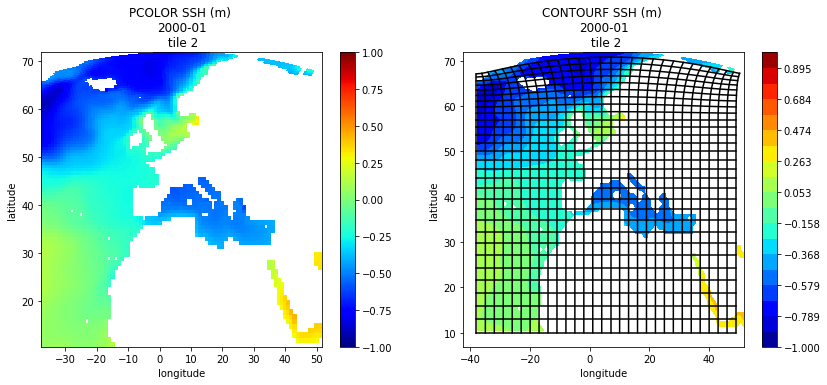

In [22]:
## pcolor and contourf
## Tile 2 (Northeast N.Atlantic)

fig=plt.figure(figsize=(10,10))

tile_num=2

# pull out lats and lons
lons = ecco_ds.XC.sel(tile=tile_num)
lats = ecco_ds.YC.sel(tile=tile_num)
tile_to_plot = ecco_ds.SSH.isel(tile=tile_num, time=1)

# mask to NaN where hFacC is == 0
# syntax is actually "keep where hFacC is not equal to zero"

tile_to_plot= tile_to_plot.where(ecco_ds.hFacC.isel(tile=tile_num,k=0) !=0, np.nan)

# create subplot for pcolor
fig = plt.subplot(221)
# use pcolor with 'lons' and 'lats' for the plot x and y axes
plt.pcolor(lons, lats, tile_to_plot, vmin=-1, vmax=1, cmap='jet')
plt.colorbar()
plt.title('PCOLOR SSH (m) \n' + str(ecco_ds.time[1].values)[0:7] + '\n tile ' + \
          str(tile_num))
plt.xlabel('longitude')
plt.ylabel('latitude')

# create subplot for contourf
fig=plt.subplot(222)
# use contourf with 'lons' and 'lats' for the plot x and y axes
plt.contourf(lons, lats, tile_to_plot, np.linspace(-1,1, 20,endpoint=True), cmap='jet',\
             vmin=-1, vmax=1)
plt.title('CONTOURF SSH (m) \n' + str(ecco_ds.time[1].values)[0:7] + '\n tile ' +\
          str(tile_num))
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar()

# plot every 3rd model grid line to show how tile 3 is 'warped' above around 60N
plt.plot(ecco_ds.XG.isel(tile=tile_num)[::3,::3], \
         ecco_ds.YG.isel(tile=tile_num)[::3,::3],'k-')
plt.plot(ecco_ds.XG.isel(tile=tile_num)[::3,::3].T, \
         ecco_ds.YG.isel(tile=tile_num)[::3,::3].T,'k-')

# push the subplots away from each other a bit
plt.subplots_adjust(bottom=0, right=1.2, top=.9)

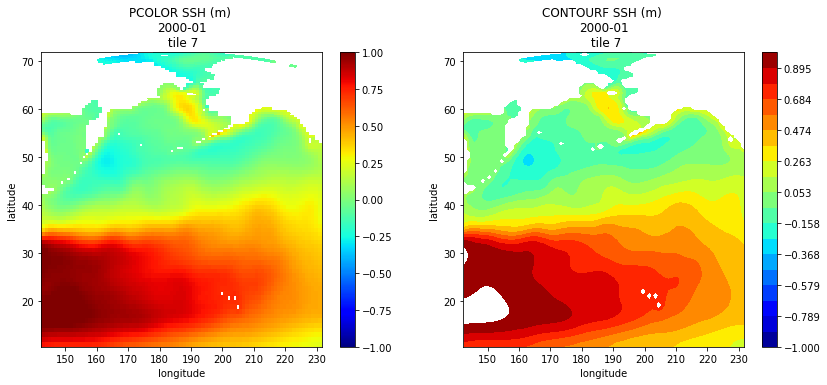

In [23]:
## Tile 7 (N. Pacific/ Bering Sea/ Chukchi Sea)

fig=plt.figure(figsize=(10, 10))
tile_num=7
# pull out lats and lons
lons = np.copy(ecco_ds.XC.sel(tile=tile_num))

# we must convert the longitude coordinates from
# [-180 to 180] to [0 to 360]
# because of the crossing of the international date line.
lons[lons < 0] = lons[lons < 0]+360
lats = ecco_ds.YC.sel(tile=tile_num)
tile_to_plot = ecco_ds.SSH.isel(tile=tile_num, time=1)

# mask to NaN where hFacC is == 0
# syntax is actually "keep where hFacC is not equal to zero"
tile_to_plot= tile_to_plot.where(ecco_ds.hFacC.isel(tile=tile_num,k=0) !=0, np.nan)

# create subplot for pcolor
fig = plt.subplot(221)
# use pcolor with 'lons' and 'lats' for the plot x and y axes
plt.pcolor(lons, lats, tile_to_plot, vmin=-1, vmax=1, cmap='jet')
plt.colorbar()
plt.title('PCOLOR SSH (m) \n' + str(ecco_ds.time[1].values)[0:7] + '\n tile ' + str(tile_num))
plt.xlabel('longitude')
plt.ylabel('latitude')

# create subplot for contourf
fig=plt.subplot(222)
# use contourf with 'lons' and 'lats' for the plot x and y axes
plt.contourf(lons, lats, tile_to_plot, np.linspace(-1,1, 20,endpoint=True), cmap='jet',\
             vmin=-1, vmax=1)
plt.title('CONTOURF SSH (m) \n' + str(ecco_ds.time[1].values)[0:7] + '\n tile ' +\
          str(tile_num))
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar()
# push the subplots away from each other a bit
plt.subplots_adjust(bottom=0, right=1.2, top=.9)